In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
import pandas_profiling as pp
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

%matplotlib inline
import pprint
import pandas_profiling as pp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/glove6b50dtxt/glove.6B.50d.txt
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/emotions-ml/merged_training.pkl


# 导入数据

In [2]:
df = pd.read_pickle("/kaggle/input/emotions-ml/merged_training.pkl")
 #显示所有列
pd.set_option('display.max_columns', None)
 #显示所有行
pd.set_option('display.max_rows', None)
 #设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 300)
df.reset_index(drop=True, inplace=True) 

完整预览

In [3]:
df.head(5)

,text,emotions
0,i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i really do feel proud of myself for actually keeping up with my new years resolution of monthly and weekly goals,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate,love


In [ ]:
# produce pandas profiling report
df.profile_report()

# 一、特征工程

统计标签类别并检视

In [10]:
df['emotions'].unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

文本类型统计分类

In [11]:
positive = ['joy','love','surprise']
negative = ['sadness','anger','fear']

positive_row = df.loc[df['emotions'].isin(positive)]
negative_row = df.loc[df['emotions'].isin(negative)]

negative_row.head()

,text,emotions
0,i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here,sadness
1,im alone i feel awful,sadness
3,i was feeling a little low few days back,sadness
9,i feel so enraged but helpless at the same time,anger
10,i said feeling a bit rebellious,anger


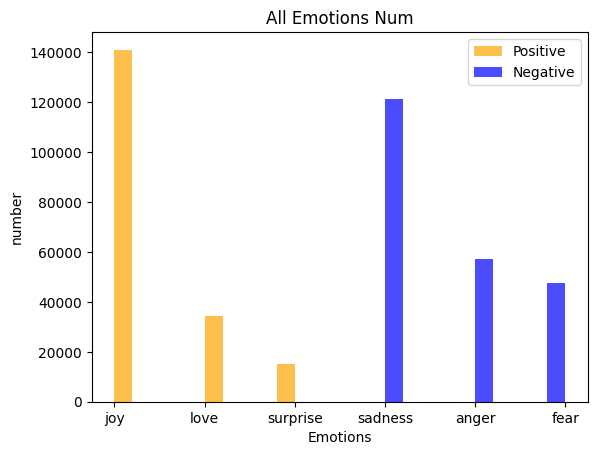

In [12]:
data1 = df[df["emotions"].isin(positive)]
data2 = df[df["emotions"].isin(negative)]

# # 合并数据并排序
# combined_data = sorted(zip(data1.emotions, data2.emotions), reverse=True)
# sorted_data_1 = [item[0] for item in combined_data]
# sorted_data_2 = [item[1] for item in combined_data]

# 设置直方图的颜色
color_1 = 'orange'  # 第一组数据的颜色
color_2 = 'blue'  # 第二组数据的颜色

# 绘制直方图
plt.hist(data1.emotions, color=color_1, alpha=0.7, label='Positive')  # 绘制第一组数据的直方图
plt.hist(data2.emotions, color=color_2, alpha=0.7, label='Negative')  # 绘制第二组数据的直方图

# 设置图例和标签
plt.legend()
plt.xlabel('Emotions')
plt.ylabel('number')
plt.title('All Emotions Num')

# 显示图形
plt.show()

In [ ]:
df.shape

划分train和test集

In [4]:
X = df['text']
y = df['emotions']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (333447,)
x_test - >   (83362,)
y_train - >   (333447,)
y_test - >   (83362,)


标签独热编码（1d -> Nd）

In [50]:
one_hot_train = pd.get_dummies(y_train)
one_hot_test = pd.get_dummies(y_test)

观察划分后样本分布

In [14]:
# Defining the number of samples in train, validation and test dataset
size_train = x_train.shape[0]
size_test = x_test.shape[0]

# Defining the total number of samples
size_all = size_train + size_test

In [15]:
# Defining classes representation for each dataset (GoEmotions)
train_count_GE = y_train.value_counts()*100/size_train
test_count_GE = y_test.value_counts()*100/size_test
# train_count_GE = (y_train.sum(axis=0) / size_train)*100
#test_count_GE = (y_test.sum(axis=0) / size_test)*100

# Constructing a unique dataset for visualization purposes
balance_GE = pd.DataFrame(data=[train_count_GE, test_count_GE]).T.reset_index(drop=False)
balance_GE.columns = ['Emotion', 'Train', 'Test']
balance_GE = balance_GE.sort_values('Train', ascending=False)
balance_GE = balance_GE.melt(id_vars='Emotion', var_name='Dataset', value_vars=['Train', 'Test'], value_name='Percentage')

# # Preview of data
display(balance_GE.head())

,Emotion,Dataset,Percentage
0,joy,Train,33.834462
1,sadness,Train,28.995013
2,anger,Train,13.788698
3,fear,Train,11.496880
4,love,Train,8.307467


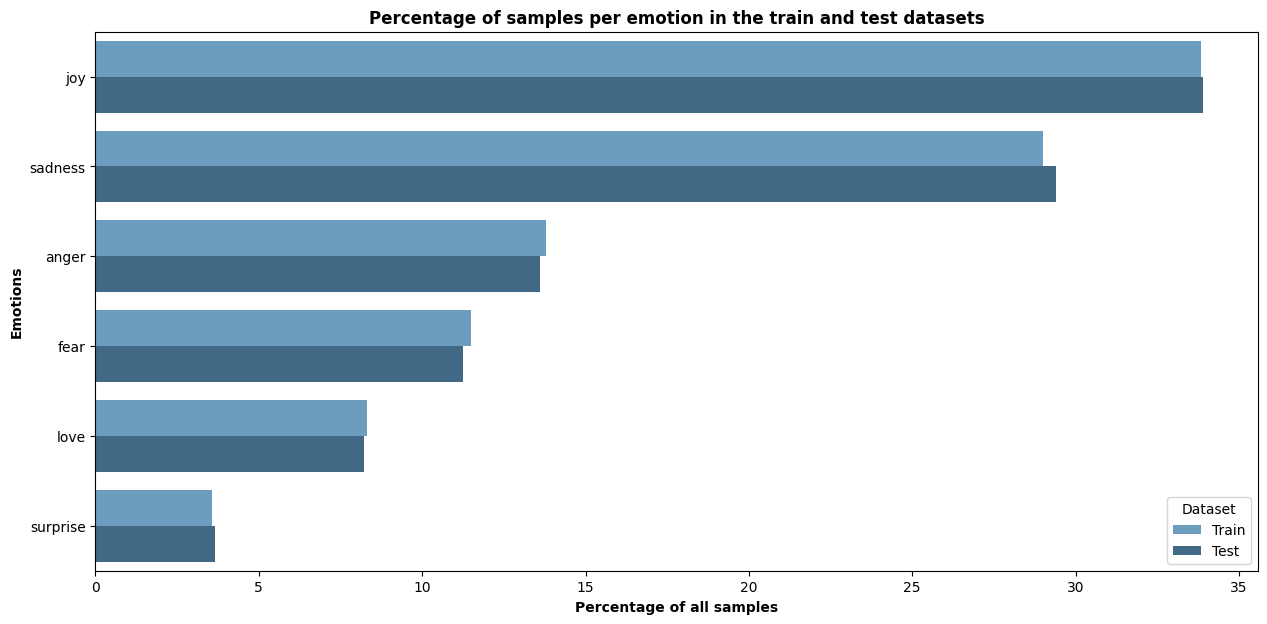

In [16]:
# Class Balance visualization
plt.figure(figsize=(15,7))
sns.barplot(x='Percentage', y='Emotion', data=balance_GE, orient='h', hue='Dataset', palette="Blues_d")
plt.title("Percentage of samples per emotion in the train and test datasets", fontweight='bold') # valiation?
plt.ylabel("Emotions", fontweight='bold')
plt.xlabel("Percentage of all samples", fontweight='bold')
plt.show()

文本特征提取

In [17]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000, max_df=0.85,ngram_range=(1,2))
vec_fit=vectorizer.fit_transform(x_train)

In [18]:
X_train_tfidf = vectorizer.transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [19]:
print(X_train_tfidf[:2])

  (0, 2920)	0.3181880472994426
  (0, 2446)	0.2930712833400844
  (0, 2268)	0.15099545112209076
  (0, 2197)	0.26004901987075646
  (0, 2105)	0.32718187564118356
  (0, 2102)	0.1644564361599983
  (0, 1892)	0.22076858065819732
  (0, 1737)	0.28138610578253265
  (0, 1565)	0.11903453017530316
  (0, 1388)	0.1894855784877114
  (0, 1208)	0.3204433091540125
  (0, 1069)	0.08459598776316281
  (0, 707)	0.2185392780944414
  (0, 470)	0.31261408557758225
  (0, 176)	0.2380283506097835
  (0, 42)	0.31364117546074305
  (1, 2954)	0.5724888977644581
  (1, 2952)	0.3367345172701699
  (1, 2832)	0.4440064633408252
  (1, 2787)	0.37890769267641833
  (1, 2483)	0.4433905094928547
  (1, 1069)	0.14682780339272758


对比观察文本提取出的特征词组

In [20]:
X_coo=vec_fit.tocoo()
features=vectorizer.get_feature_names_out()

In [21]:
sentence_size=X_coo.row.tolist().count(0)
sentence_st=X_coo.row.tolist().index(0)
sentence_loc=X_coo.col[sentence_st:sentence_st+sentence_size]
sentence=[features[i] for i in sentence_loc]
print(df.text[x_train.index[0]])
print(sentence)
print('\n')

sentence_size=X_coo.row.tolist().count(2)
sentence_st=X_coo.row.tolist().index(2)
sentence_loc=X_coo.col[sentence_st:sentence_st+sentence_size]
sentence=[features[i] for i in sentence_loc]
print(df.text[x_train.index[2]])
print(sentence)
print('\n')

sentence_size=X_coo.row.tolist().count(3)
sentence_st=X_coo.row.tolist().index(3)
sentence_loc=X_coo.col[sentence_st:sentence_st+sentence_size]
sentence=[features[i] for i in sentence_loc]
print(df.text[x_train.index[3]])
print(sentence)

im sharing what weve done and learned only because when i was making decisions about what was best for our family it was really intimidating for me to get good advice from people without feeling pressured from one side or the other
['feeling pressured', 'people feeling', 'pressured', 'feeling', 'people', 'advice', 'good', 'really', 'family', 'best', 'decisions', 'making', 'learned', 'weve', 'sharing', 'im']


i feel very jolly
['jolly', 'feel']


i like to keep it on my desk for a middle of the day pick me up when im feeling stressed
['feeling stressed', 'im feeling', 'stressed', 'pick', 'day', 'middle', 'desk', 'like', 'feeling', 'im']


# 二、模型搭建

# 支持向量机SVM实现多分类

过采样扩充样本

In [ ]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import  SMOTE
#过采样
smt = SMOTE(random_state=777, k_neigShbors=1)
X_SMOTE, y_SMOTE= smt.fit_resample(vec_fit,train.text)

from collections import Counter
#样本已被扩充 
print(Counter(y_SMOTE))

In [22]:
from sklearn import svmSS
from collections import Counter

model_svm=svm.LinearSVC()SS
model_svm.fit(X_train_tfidf, y_train)

LinearSVC()

分析模型权重矩阵，统计特征权重

In [23]:
import eli5
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
eli5.show_weights(model_svm, vec=vectorizer, feature_names=features, top=50, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
coef=eli5.explain_weights_df(model_svm, vec=vectorizer, feature_names=features, top=1000, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
#coef=coef.drop('target',axis='columns')


In [ ]:
import os
from os import path
from wordcloud import WordCloud

def makeWordcloud(coef, t):
    #创建权重字典
    tmp = coef[coef['target']==t]
    tmp = tmp.drop('target',axis='columns')
    print(tmp.head())
    text = dict(zip(tmp['feature'],abs(tmp['weight'])))
    
    # 创建词云
    wordcloud = WordCloud(background_color="white")
    wordcloud = WordCloud().generate_from_frequencies(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")


绘制标签’sadness‘词云

In [ ]:
makeWordcloud(coef, 'sadness')

绘制标签’joy‘词云

In [ ]:
makeWordcloud(coef, 'joy')

绘制标签’love‘词云

In [ ]:
makeWordcloud(coef, 'love')

# 岭回归实现多分类

In [ ]:
# Multi-label classification 
rc = RidgeClassifier(class_weight='balanced')
classifier = MultiOutputClassifier(rc, n_jobs=-1)
classifier.fit(X_train_tfidf, one_hot_train)

In [24]:
# Making predictions
model_svm_preds = model_svm.predict(X_test_tfidf)
model_svm_preds = pd.get_dummies(model_svm_preds)
model_svm_preds.head(5)

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, model_svm_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, model_svm_preds, target_names=emotions))

Test accuracy = 0.9043569012259782
              precision    recall  f1-score   support

     sadness       0.91      0.90      0.91     11339
         joy       0.86      0.86      0.86      9376
        love       0.91      0.93      0.92     28247
       anger       0.81      0.80      0.80      6853
        fear       0.95      0.94      0.94     24504
    surprise       0.78      0.74      0.76      3043

   micro avg       0.90      0.90      0.90     83362
   macro avg       0.87      0.86      0.87     83362
weighted avg       0.90      0.90      0.90     83362
 samples avg       0.90      0.90      0.90     83362



In [ ]:
# Making predictions
classifier_preds = classifier.predict(X_test_tfidf)
classifier_preds

输出分析：预测精度、召回率、F1-score

In [ ]:
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, classifier_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, classifier_preds, target_names=emotions))

# Logistic实现多分类

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = MultiOutputClassifier(LogisticRegression()).fit(X_train_tfidf, one_hot_train)
clf_p = clf.predict(X_test_tfidf)

In [ ]:
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, clf_p)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, clf_p, target_names=emotions))

# 基于Word2Vec的手写Sentence Embedding 

首先，将训练集和验证集合并在一起，一同训练word2vec语料模型

In [ ]:
# Let’s load the libraries

import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
import gensim, logging
import os
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec,Word2Vec
import gensim.models.doc2vec

In [ ]:
%%time

tokenized_tweet = X.apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,

            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(X), epochs=20)

In [ ]:
model_w2v.save('new_w2v_based01.h5')

观察与happy相关度最高的几个token

In [ ]:
model_w2v.wv.most_similar(positive="happy")

语句切片并预览

In [ ]:
tokenized_tweet = X.apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head(5)

一个用于将语句中单词vector加权平均得到语句vector的函数

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
s2v_arrays = np.zeros((len(tokenized_tweet), 100)) 
for i in range(len(X)):
    s2v_arrays[i,:] = word_vector(tokenized_tweet[i],100)    

s2v = pd.DataFrame(s2v_arrays) 
s2v.shape

In [ ]:
s2v.head(1)

svm训练打分

In [ ]:
xtrain_w2v,xtest_w2v,y_train,y_test=train_test_split(s2v,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import svm
from collections import Counter

model_svm=svm.LinearSVC()
model_svm.fit(xtrain_w2v, y_train)

# Making predictions
model_svm_preds = model_svm.predict(xtest_w2v)
model_svm_preds = pd.get_dummies(model_svm_preds)
model_svm_preds.head(5)

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, model_svm_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, model_svm_preds, target_names=emotions))

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(model_svm, 'new_svm_s2v_01.h5')
# # model_svm.save('new_svm_s2v_01.h5')

在不含上下文关系与位置关系的向量的基础之上，参照transfomer的position embedding方法，同样在这里为每个token的每个维度添加正弦或余弦的位置矢量

In [ ]:
def pos_embedding(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    pos = 0
    L = len(tokens)
    pe = np.zeros((L,size))
    for word in tokens:
        try:
            pos = np.arange(size)  # 创建pos数组，范围为0到size-1
            # 计算分母部分
            denominator = np.power(10000, 2 * pos / size)
            # 使用条件判断和NumPy的向量化函数进行赋值
            pe = np.where(pos % 2 == 0, np.sin(pos / denominator), np.cos(pos / denominator))
            vec += model_w2v.wv[word].reshape((1, size))
            vec += pe[pos]
            pos += 1
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
s2v_arrays = np.zeros((len(tokenized_tweet), 100)) 
for i in tqdm(range(len(X))):
    s2v_arrays[i,:] = pos_embedding(tokenized_tweet[i],100)    

s2v_pos_df = pd.DataFrame(s2v_arrays) 
s2v_pos_df.shape

In [ ]:
s2v_pos_df.head(1)

In [ ]:
xtrain_w2v,xtest_w2v,y_train,y_test=train_test_split(s2v_pos_df,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import svm
from collections import Counter

model_svm=svm.LinearSVC()
model_svm.fit(xtrain_w2v, y_train)

# Making predictions
model_svm_preds = model_svm.predict(xtest_w2v)
model_svm_preds = pd.get_dummies(model_svm_preds)
model_svm_preds.head(5)

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, model_svm_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, model_svm_preds, target_names=emotions))

In [ ]:
model_svm.save('new_svm_s2v_02.h5')

# SentenceBert2Vec

In [ ]:
!pip install -U sentence-transformers

模型加载

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

文本（语句）向量化

In [ ]:
# sentences = [x_train[x_train.index[0:1]]]
sentences_train = []
for i in range(x_train.shape[0]):
    sentences_train.append(x_train[x_train.index[i]])
print(len(sentences_train))
sentence_train_embeddings = model.encode(sentences_train)

In [ ]:
sentences_test = []
for i in range(x_test.shape[0]):
    sentences_test.append(x_test[x_test.index[i]])
print(len(sentences_test))
sentence_test_embeddings = model.encode(sentences_test)

语句向量化检视

In [ ]:
for sentence, embedding in zip(sentences_train, sentence_train_embeddings):
    print("Sentence:", sentence)
    pprint.pprint(embedding)
    print("")
    break

svm评分

In [ ]:
from sklearn import svm
from collections import Counter

model_svm=svm.LinearSVC()
model_svm.fit(sentence_train_embeddings, y_train)

In [ ]:
# Making predictions
model_svm_preds = model_svm.predict(sentence_test_embeddings)
model_svm_preds = pd.get_dummies(model_svm_preds)
model_svm_preds.head(5)

In [ ]:
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, model_svm_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, model_svm_preds, target_names=emotions))

In [ ]:
model_svm.save('new_svm_sentencebert_01.h5')

RidgeClass评分

In [ ]:
# Multi-label classification 
rc = RidgeClassifier(class_weight='balanced')
classifier = MultiOutputClassifier(rc, n_jobs=-1)
classifier.fit(sentence_train_embeddings, one_hot_train)

# Making predictions
classifier_preds = classifier.predict(sentence_test_embeddings)
classifier_preds

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, classifier_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, classifier_preds, target_names=emotions))

LogisticRegression评分

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = MultiOutputClassifier(LogisticRegression()).fit(sentence_train_embeddings, one_hot_train)
clf_p = clf.predict(sentence_test_embeddings)

# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, clf_p)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, clf_p, target_names=emotions))

# Doc2Vec

用于给token打上标签的函数

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s.split(), ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(X) # label all the tweets

In [ ]:
labeled_tweets[:6]

In [ ]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(X), epochs=15)

In [ ]:
model_d2v.save('new_d2v_01.h5')

In [ ]:
tokenized_tweet = X.apply(lambda x: x.split()) # tokenizing 

docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(X)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

In [ ]:
xtrain_d2v,xtest_d2v,y_train,y_test=train_test_split(docvec_df,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import svm
from collections import Counter

model_svm=svm.LinearSVC()
model_svm.fit(xtrain_d2v, y_train)

# Making predictions
model_svm_preds = model_svm.predict(xtest_d2v)
model_svm_preds = pd.get_dummies(model_svm_preds)
model_svm_preds.head(5)

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
# Check test accuracy
test_accuracy = accuracy_score(one_hot_test, model_svm_preds)
print('Test accuracy = {}'.format(test_accuracy))

## Show results
print(classification_report(one_hot_test, model_svm_preds, target_names=emotions))

In [ ]:
model_svm.save('new_svm_d2v_01.h5')

# 三、深度学习

# BisimpleRNN

In [7]:
tokenizer = Tokenizer(num_words=100000, oov_token='<00V>') 
tokenizer.fit_on_texts(x_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(x_train) # converts strinfs into integer lists
train_padseq = pad_sequences(train_seq, maxlen=20) # pads the integer lists to 2D integer tensor 
print(train_padseq.shape)
# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(x_test)
test_padseq = pad_sequences(test_seq, maxlen=20)

word_index = tokenizer.word_index
max_words = 150000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 20 # max length of sequence 
# y_train = to_categorical(y_train, num_classes=6)
# y_test = to_categorical(y_test, num_classes=6)
print("Length of word index:", total_words)

(333447, 20)
Length of word index: 67744


In [57]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 100, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           6774400   
                                                                 
 bidirectional_7 (Bidirectio  (None, 20, 128)          21120     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 20, 128)          24704     
 nal)                                                            
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 41)               

In [65]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = ModelCheckpoint(filepath='bestvalue',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history = model.fit(train_padseq, one_hot_train, 
                     batch_size=128, 
                     epochs=10, 
                     validation_split=0.2,
                     shuffle=True
                   )

# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, one_hot_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/10


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 6) and (None, 41) are incompatible


In [ ]:
model.save("news_simRnn_01.h5")

# 深度复杂BiLSTM+RNN+Dropout+GRU

In [55]:
model2 = Sequential()
model2.add(Embedding(total_words, 100, input_length=maxlen))
model2.add(Bidirectional(LSTM(64, dropout=0.1, recurrent_dropout=0.10, activation='tanh', return_sequences=True)))
model2.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model2.add(Conv1D(72, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(SimpleRNN(64, activation='tanh', dropout=0.2, recurrent_dropout=0.20, return_sequences=True))
model2.add(GRU(64, recurrent_dropout=0.20, recurrent_regularizer='l1_l2'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           6774400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 20, 128)          84480     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 20, 128)          24704     
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 18, 72)            27720     
                                                      

In [ ]:
# model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue1',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history2 = model2.fit(train_padseq, one_hot_train, 
                     batch_size=128, 
                     epochs=10, 
                     validation_split=0.2,
                     shuffle=True
                    )

# evalute the model
test_loss2, test_acc2 = model2.evaluate(test_padseq, one_hot_test, verbose=0)
print("test loss and accuracy:", test_loss2, test_acc2)

In [ ]:
model.save("news_Rnn_01.h5")

In [ ]:
model_preds = model2.predict(test_padseq)
model_preds

In [ ]:
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
print(classification_report(one_hot_test, (model_preds == model_preds.max(axis=1, keepdims=1)).astype(float), target_names=emotions))